# SETUP

In [1]:
# Lib
import pathlib
import pandas as pd
from revenue_causal.cluster_lasso import cluster_lasso
from revenue_causal.hdcce_estimator import hdcce_estimator
from revenue_causal.hdcce_inference import hdcce_inference

In [2]:
# Data
base = pathlib.Path.cwd()
path = base/"data_used/df_revenue.csv"
df = pd.read_csv(path)
df = df.sort_values(by=['company', 'year'])

# MAIN

## M1: Cluster lasso

In [3]:
X = df.drop(columns=['revenue'])
y = df[['company', 'year', 'revenue']]
cluster_lasso(X, y)

Converged at iteration 2


revenue_lag1    0.569303
dtype: float64

- This case of p << nT is not suited for Cluster Lasso
- Cluster Lasso output is not ready to use due to bias and unobs effect
- Cluster DOUBLE SELECTION is needed to DEBIAS the CONFOUNDER part as well

## M2: HDCCE

The version has been adapted to unbalanced data, deviating from original source

Estimated K = 1


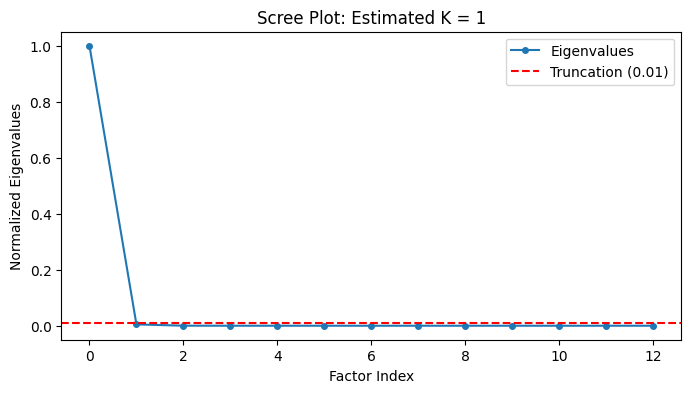

GroupKFold (NFOLDS=10) used.
CV complete. Lambda min: 0.005727


{'coefs': array([ 9.94166557e-01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -4.65918791e-16, -3.55305734e-16,  0.00000000e+00,
        -2.41970550e-14,  0.00000000e+00,  0.00000000e+00,  1.77705435e-02,
        -2.04903833e-14]),
 'K_hat': np.int64(1),
 'Lambda': np.float64(0.00572663867273755)}

In [4]:
X = df.drop(columns=['revenue'])
y = df[['company', 'year', 'revenue']]
# cluster_lasso(X,y)
hdcce_estimator(df, 'company', 'year', 'revenue', ['revenue_lag1', 'in_stock_lag1', 'invest_nav_lag1', 'long_receive_lag1',
       'long_liability_lag1', 'other_long_asset_lag1', 'cwip_lag1',
       'other_short_asset_lag1', 'long_invest_lag1', 'other_fund_lag1',
       'gov_own_lag1', 'for_own_lag1', 'expense_lag1'])

In [ ]:
hdcce_inference(df, 'company', 'year', 'revenue', ['revenue_lag1', 'in_stock_lag1', 'invest_nav_lag1', 'long_receive_lag1', 'long_liability_lag1', 'other_long_asset_lag1', 'cwip_lag1','other_short_asset_lag1', 'long_invest_lag1', 'other_fund_lag1','gov_own_lag1', 'for_own_lag1', 'expense_lag1'])